In [121]:
engine='python'
def take_data(site, nome):
    from bs4 import BeautifulSoup
    import requests as req
    
    url = site
    html = req.get(url).text
    
    arq = nome
    
    with open(arq, "w") as file:
        file.write(str(html))
    
    data = pd.read_csv(arq, sep='     ')
    return data
    
## em análise, vai ser na mao msm agr    

In [122]:
data_moa = take_data("https://ogle.astrouw.edu.pl/cont/4_main/epl/blg390/MOA2_data.txt", "moa")

C:\Users\ylana\AppData\Local\Temp\ipykernel_18988\1448217075.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(arq, sep='     ')


In [123]:
## web scrapping ogle observatory

from bs4 import BeautifulSoup
import requests as req

url = "https://ogle.astrouw.edu.pl/ogle/ogle3/ews/2005/blg-390/phot.dat"
html = req.get(url).text
soup = BeautifulSoup(html, 'html5lib')

with open("copy.txt", "w") as file:
    file.write(str(html))

In [124]:
data_ogle = pd.read_csv('copy.txt', sep=' ')

data_ogle = data_ogle.rename(columns={'2452125.56972' : 'time_hjd'})
data_ogle = data_ogle.rename(columns={'15.559' : 'I magnitude'})
data_ogle = data_ogle.rename(columns={'0.006' : 'Imagnitude_erro'})


(2453520.0, 2453650.0)

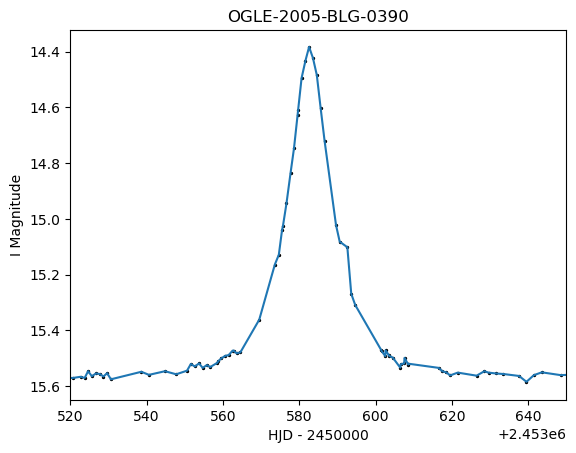

In [125]:
x = data_ogle['time_hjd']
y = data_ogle['I magnitude']
#yerro = data_ogle['Imagnitude_erro']


plt.title('OGLE-2005-BLG-0390')
plt.xlabel('HJD - 2450000')
plt.ylabel('I Magnitude')
plt.scatter(x,y, s=2, c='black')
plt.plot(x,y)
plt.gca().invert_yaxis()
#plt.errorbar(x, y, yerr = yerror, xerr = None, fmt= 'o', ecolor='gray', elinewidth=0.5, s = 2)  
plt.xlim(2.45352e6,2.45365e6)